<a href="https://colab.research.google.com/github/gulce0/IE-423/blob/main/FinalExam_GulceYildiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Whether a Visitor to an Online Shopping Website Will Make a Purchase**

# Initialize

In [81]:
pip install pandas numpy matplotlib seaborn scikit-learn

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/final/onlineshopping.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
# Display the first few rows of the dataset
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
# Describing the dataset

df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

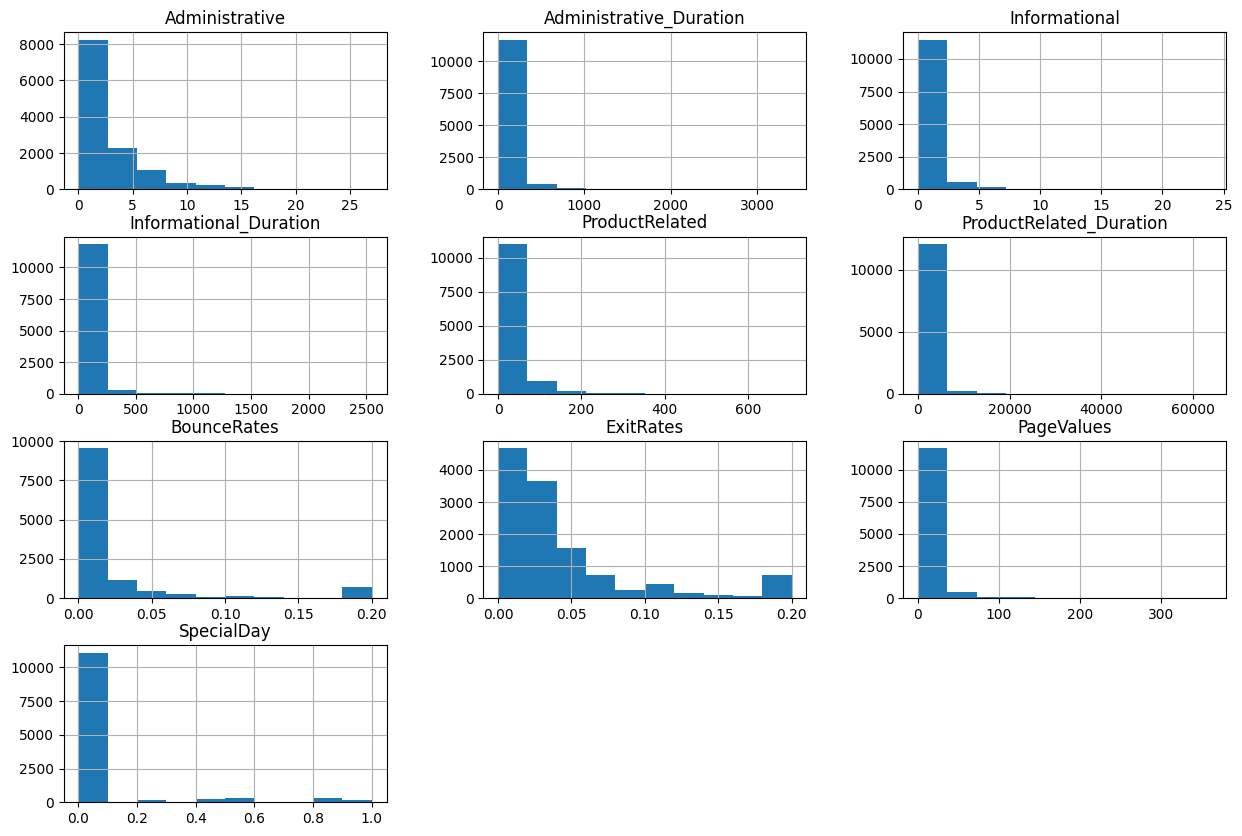

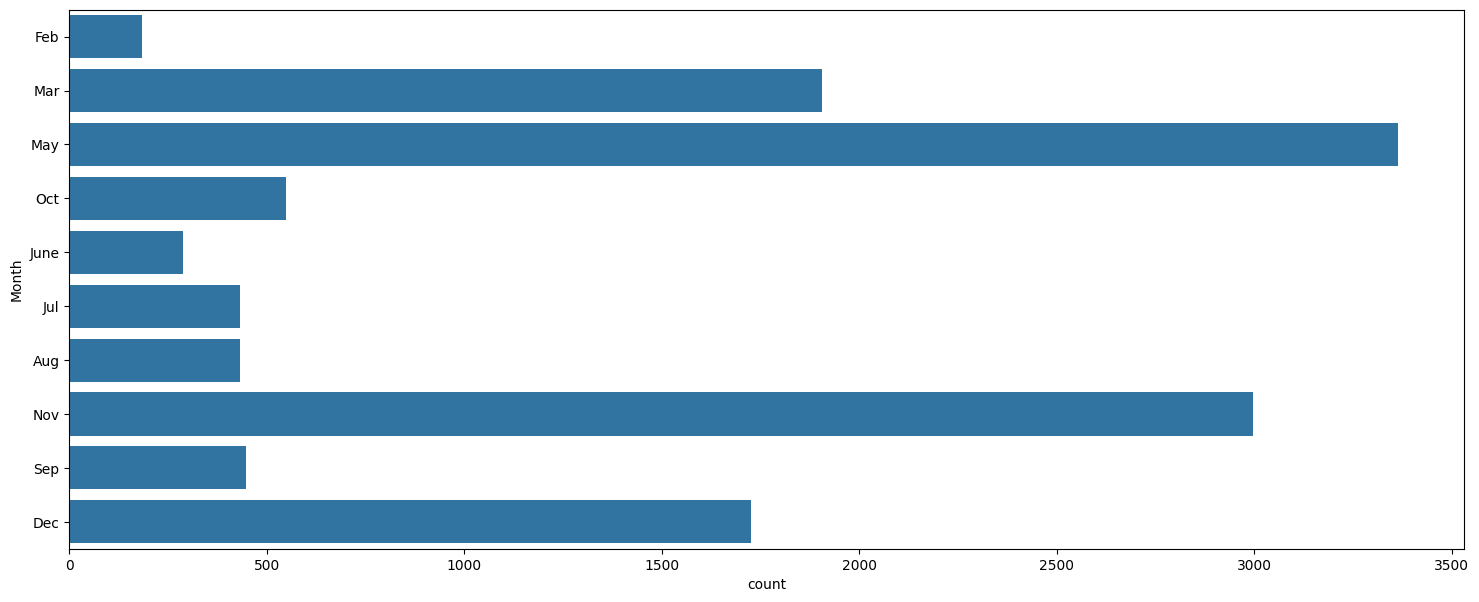

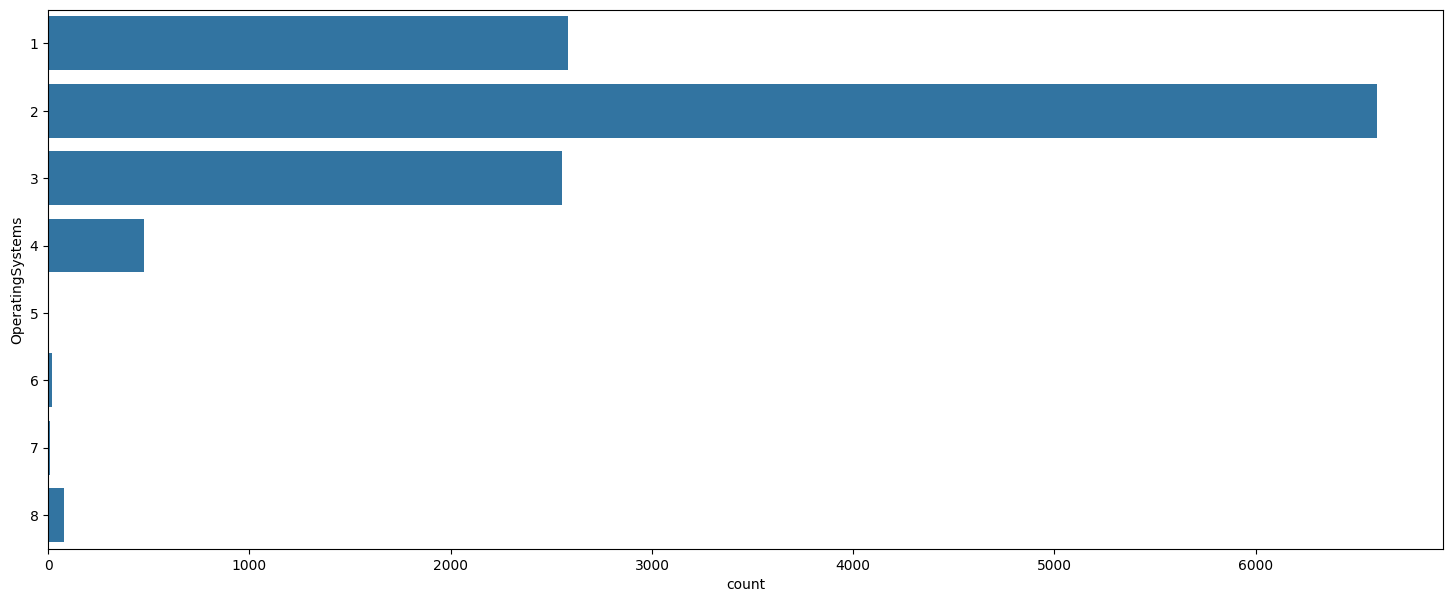

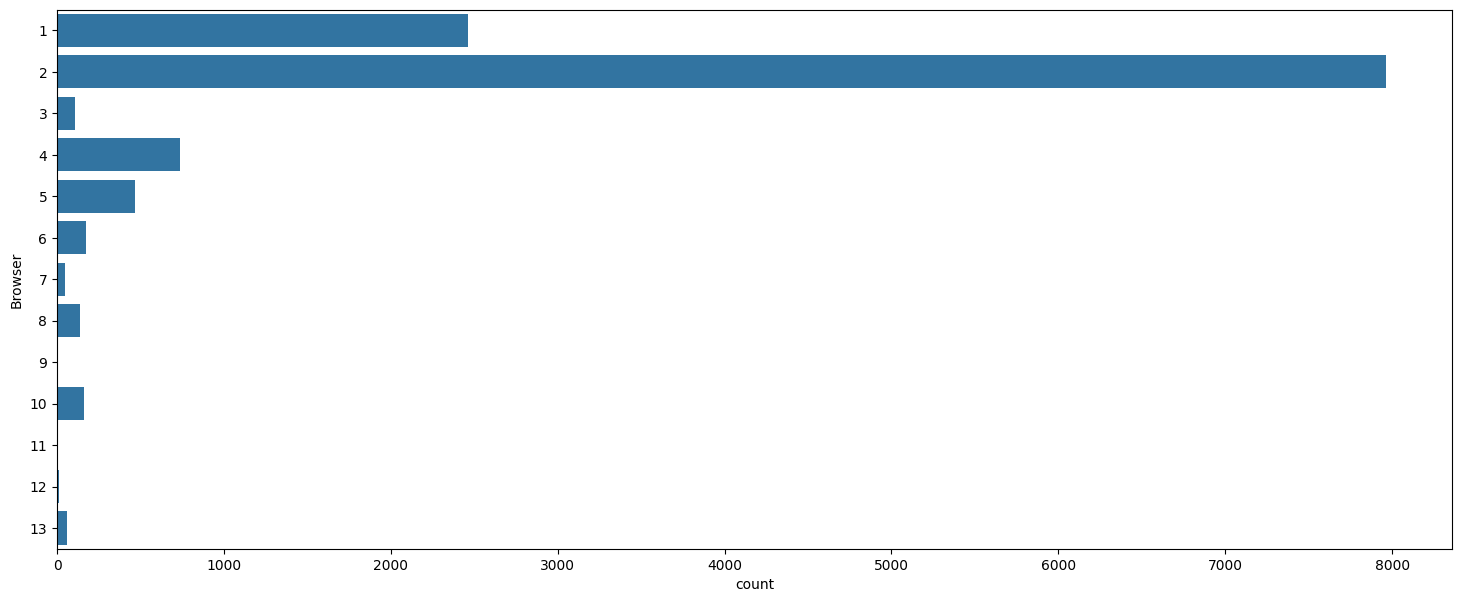

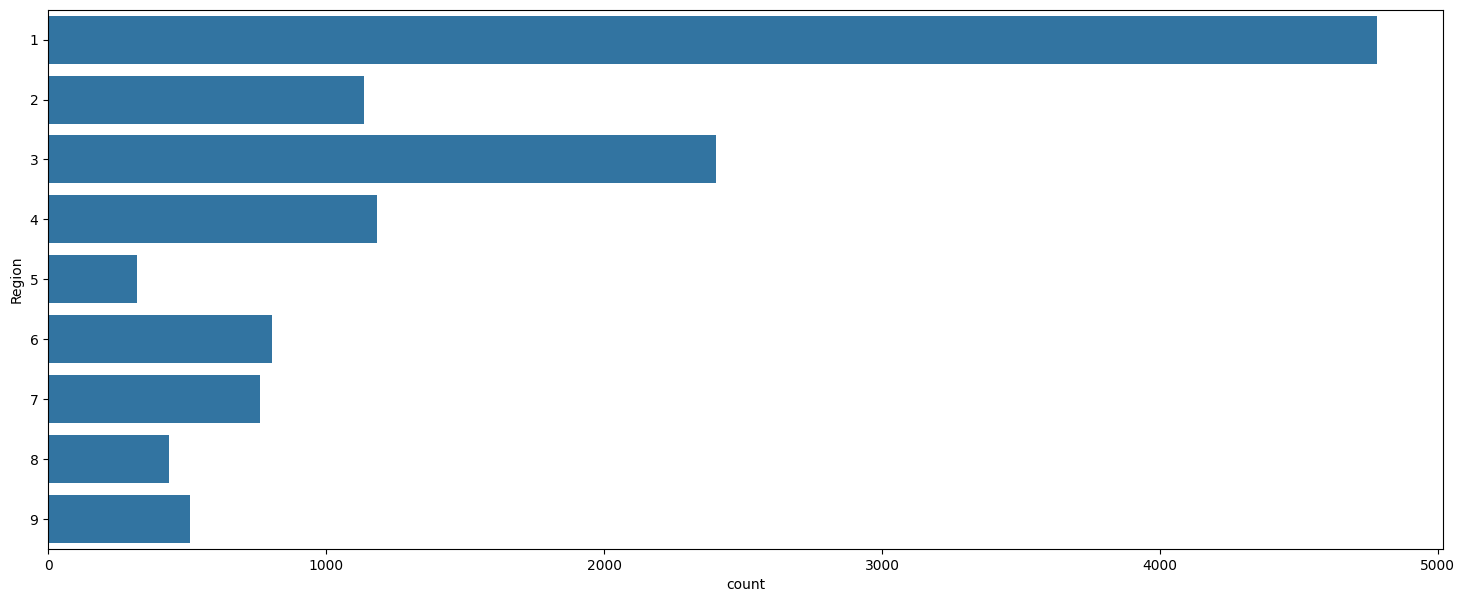

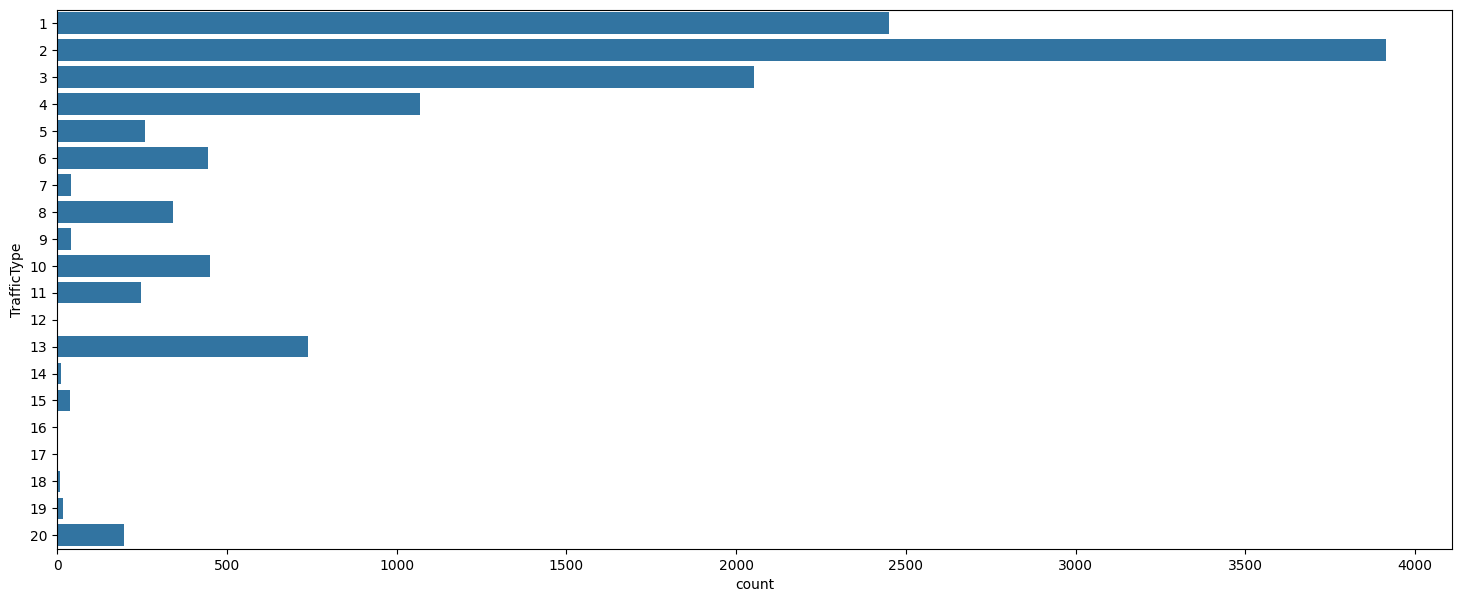

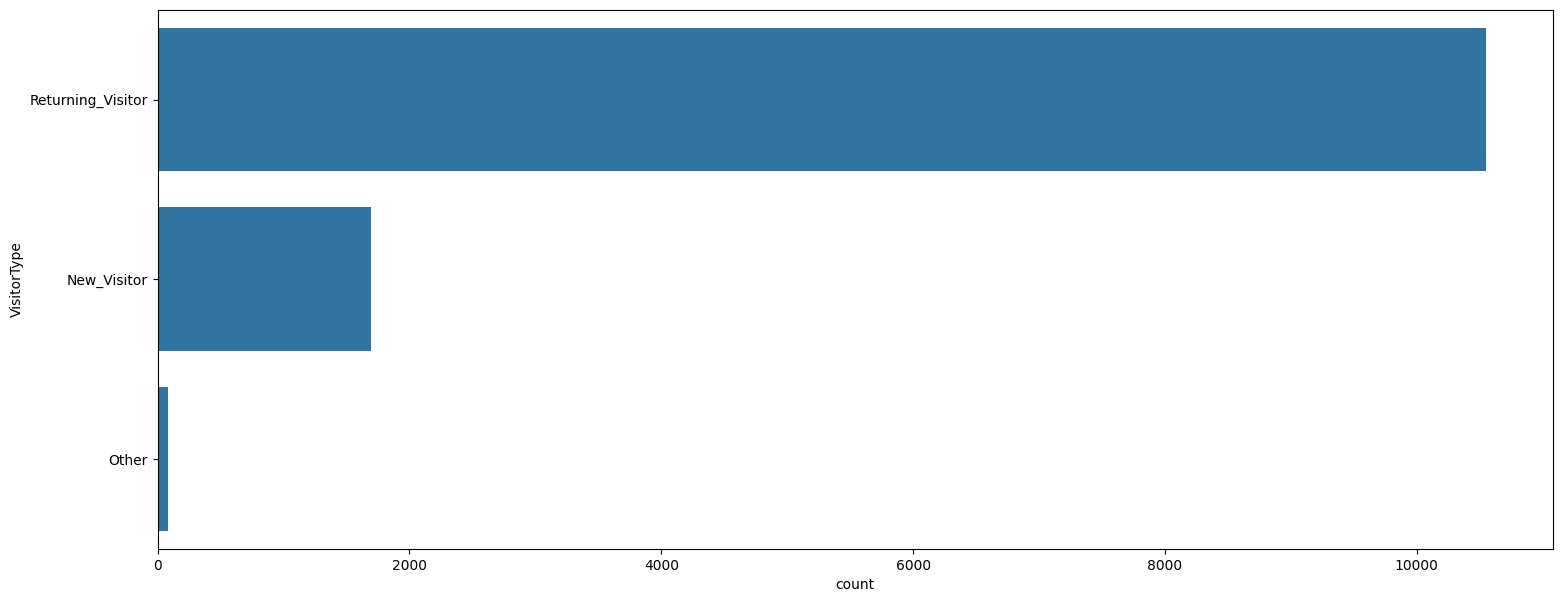

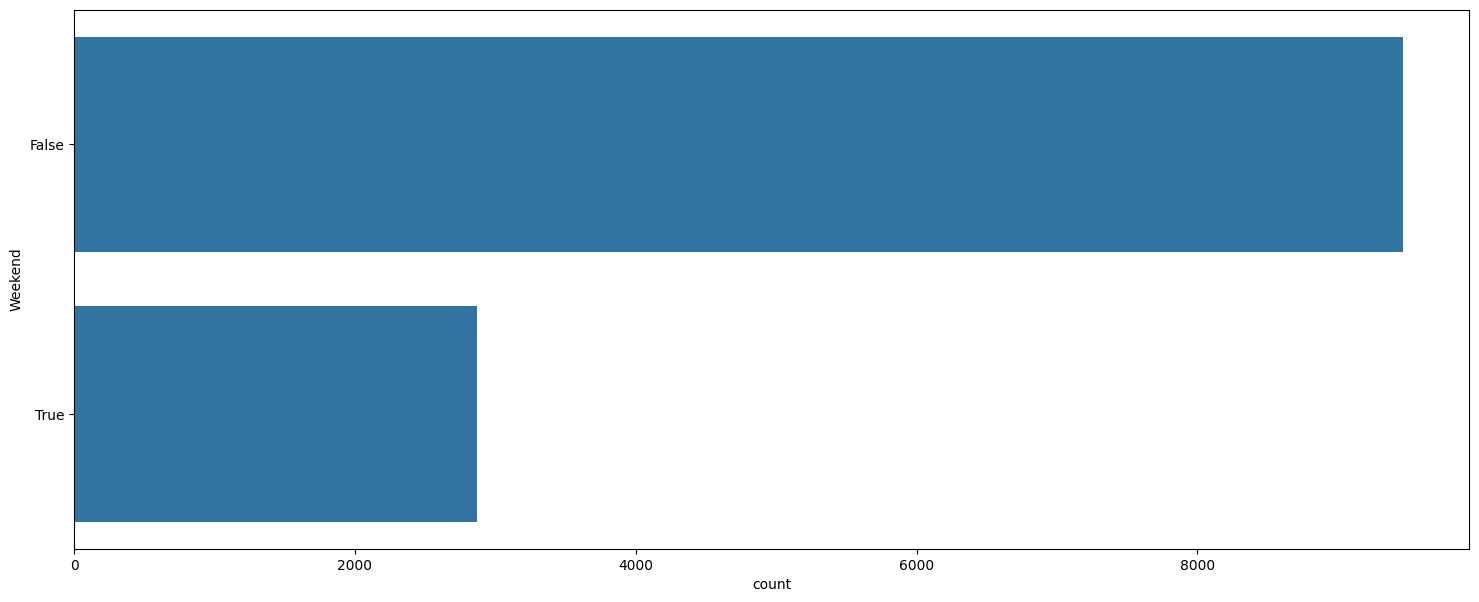

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical variables
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df[numerical_features].hist(figsize=(15, 10))
plt.show()

# Visualize the distribution of categorical variables
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
for feature in categorical_features:
    sns.countplot(y=feature, data=df)
    plt.show()

I obtained visual information from the variable distributions. For example, the majority of visitors return to the website following their visit. The majority of the sessions occurred on weekdays. The majority of the sessions are launched from Region 1. Users do not spend much time or visit numerous pages containing administrative, informational, or product-specific material.

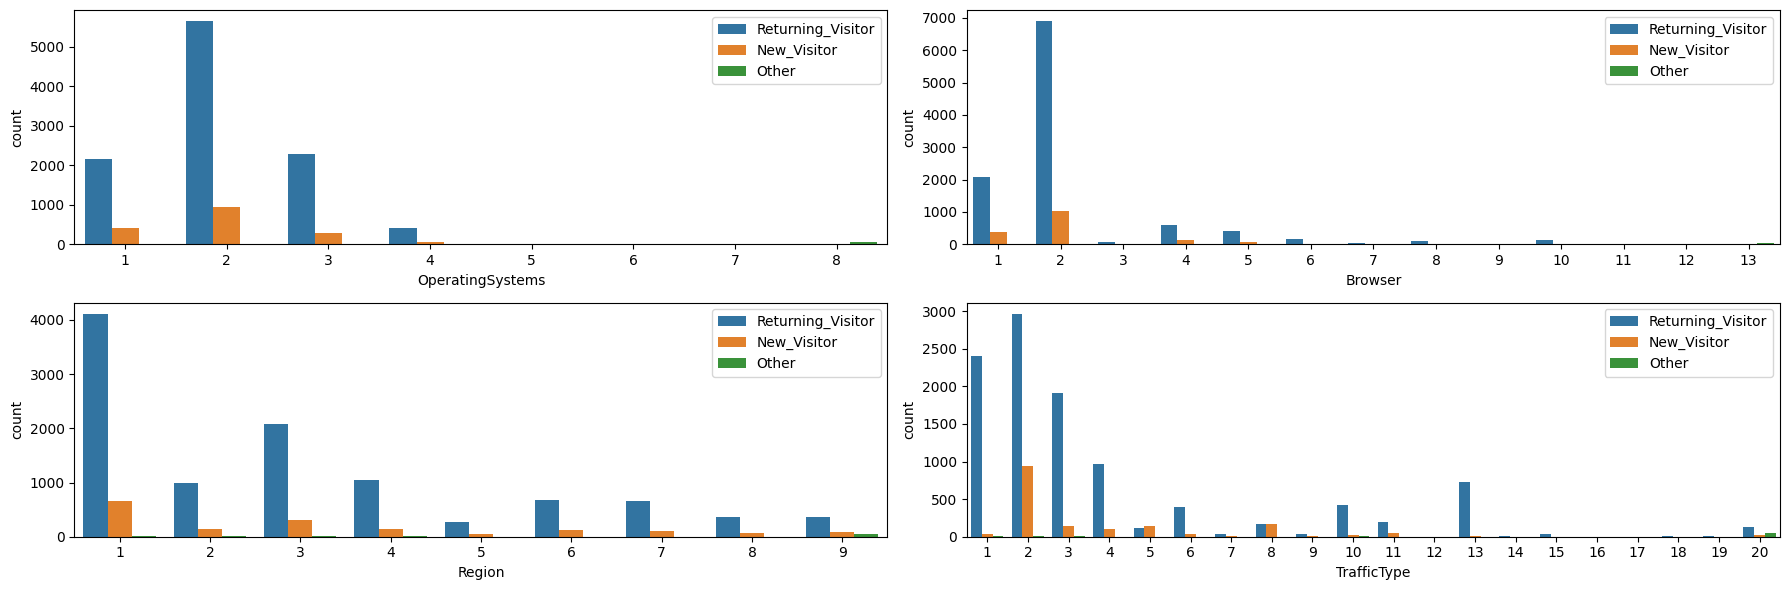

In [ ]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

The charts show separate user categories depending on their operating systems, browsers, regions, and traffic types. Understanding these segments aids in developing marketing strategy. For example, a marketing effort aimed at cluster 2 could target consumers that use OS system 2 and browser 2.

# Data Preprocessing (Following two code cells)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df['Month'] = df['Month'].astype('category').cat.codes
df['VisitorType'] = df['VisitorType'].astype('category').cat.codes
df['Weekend'] = df['Weekend'].astype('category').cat.codes

In [ ]:
df.head()


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0    False  
1        2       1            2            2        0    False  
2        1       9            3            2        0    False  
3        2       2            4            2        0    False  
4        3       1            4            2        1    False

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

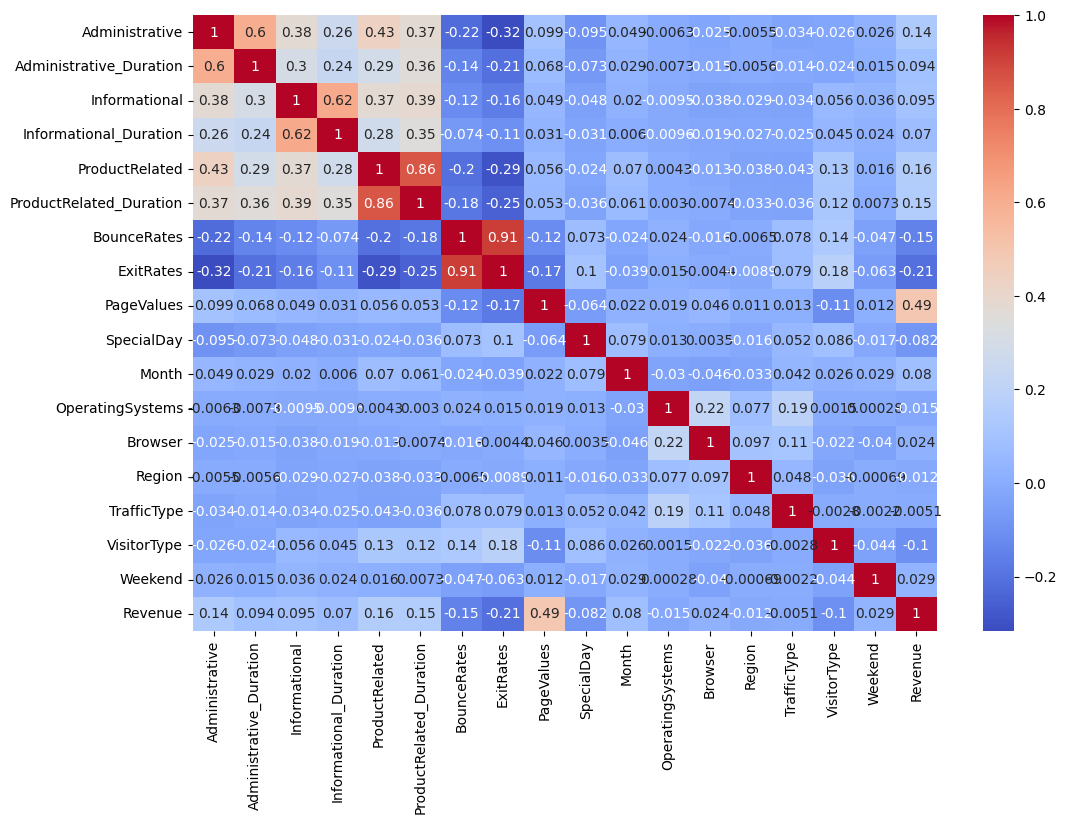

In [ ]:
# Correlation matrix to get the relationships between features
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Each cell in the matrix represents the correlation coefficient between two variables, ranging from -1 to 1. Here are some insights from the matrix:


PageValues is the highest predictor of Revenue, indicating that pages with higher values are more likely to result in purchases.(0.49) Higher bounce and departure rates are slightly associated with decreased revenue, implying that sessions that terminate early are less likely to result in purchases. (-0.15)  Browser and Region have relatively modest associations with Revenue. Bounce Rates and leave Rates are quite closely connected, implying that pages with high bounce rates are likewise likely to have high leave rates (0.91).





<ipython-input-66-a9b0aec5c4ab>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Revenue', y='PageValues', data=df, palette='Set1')
<ipython-input-66-a9b0aec5c4ab>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Revenue', y='ExitRates', data=df, palette='Set2')


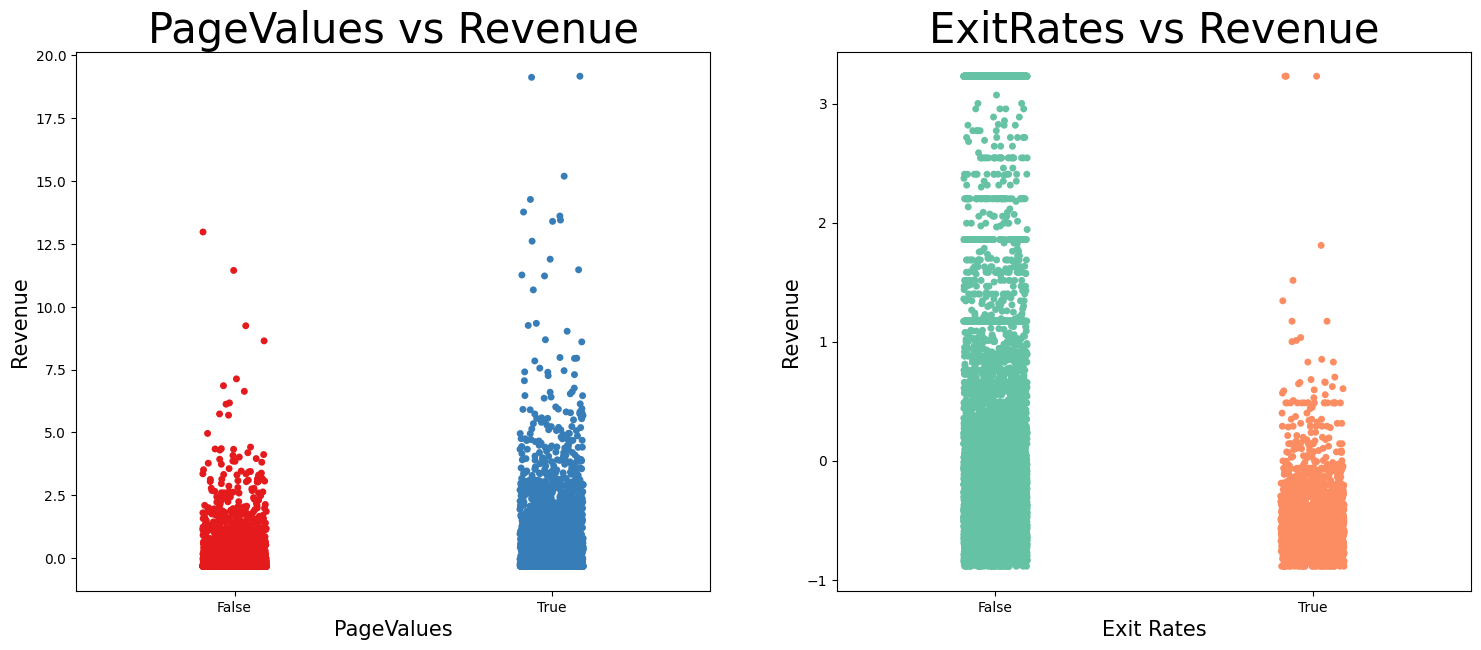

In [ ]:
# Page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
# Pass x and y as keyword arguments
sns.stripplot(x='Revenue', y='PageValues', data=df, palette='Set1')
plt.title('PageValues vs Revenue', fontsize=30)
plt.xlabel('PageValues', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

# Exit rates vs revenue
plt.subplot(1, 2, 2)
# Pass x and y as keyword arguments
sns.stripplot(x='Revenue', y='ExitRates', data=df, palette='Set2')
plt.title('ExitRates vs Revenue', fontsize=30)
plt.xlabel('Exit Rates', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

plt.show()


From correlation matrix the relationship between revenue - exit rates and revenue - page values have already seen. But i want to see them seperately. The first plot indicates that sessions with higher PageValues are more likely to result in purchases and the second plot indicates that sessions with lower ExitRates are more likely to result in purchases as expected.

Now i want to cluster the customers, which will help us in marketing strategies.

In [ ]:
# Feature selection
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
            'SpecialDay']

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features)

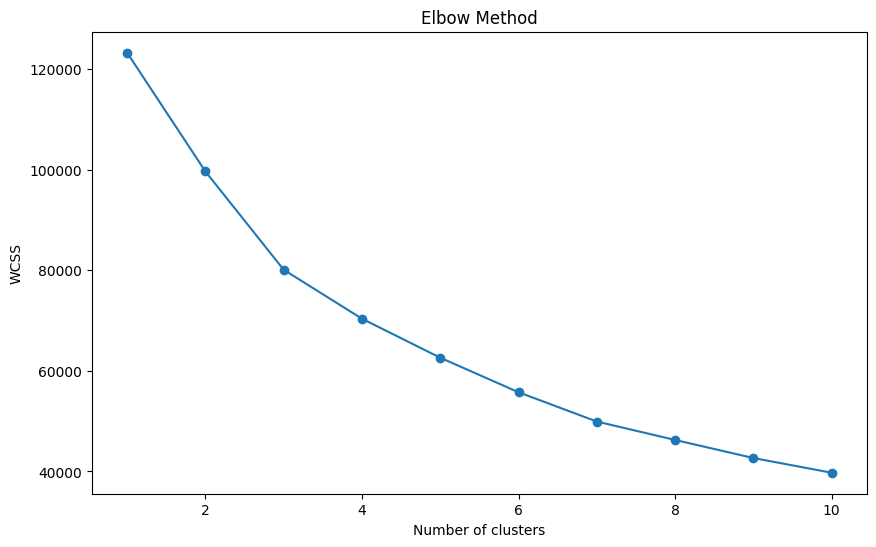

In [ ]:
from sklearn.cluster import KMeans
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows of the clustered data
df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821      2                 1   
1    -0.457683   1.171473   -0.317178   -0.308821      2                 2   
2     3.667189   3.229316   -0.317178   -0.308821      2                 4   
3     0.573535   1.994610   -0.317178   -0.308821      2                 3   
4    -0.045196   0.142551   -0.317178   -0.308821      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  Cluster  
0        1       1            1            2        0    False        2  
1        2       1            2            2        0    False        0  
2        1       9            3            2        0    False        2  
3        2       2            4            2        0    False        0  
4        3       1            4            2        1    False        0

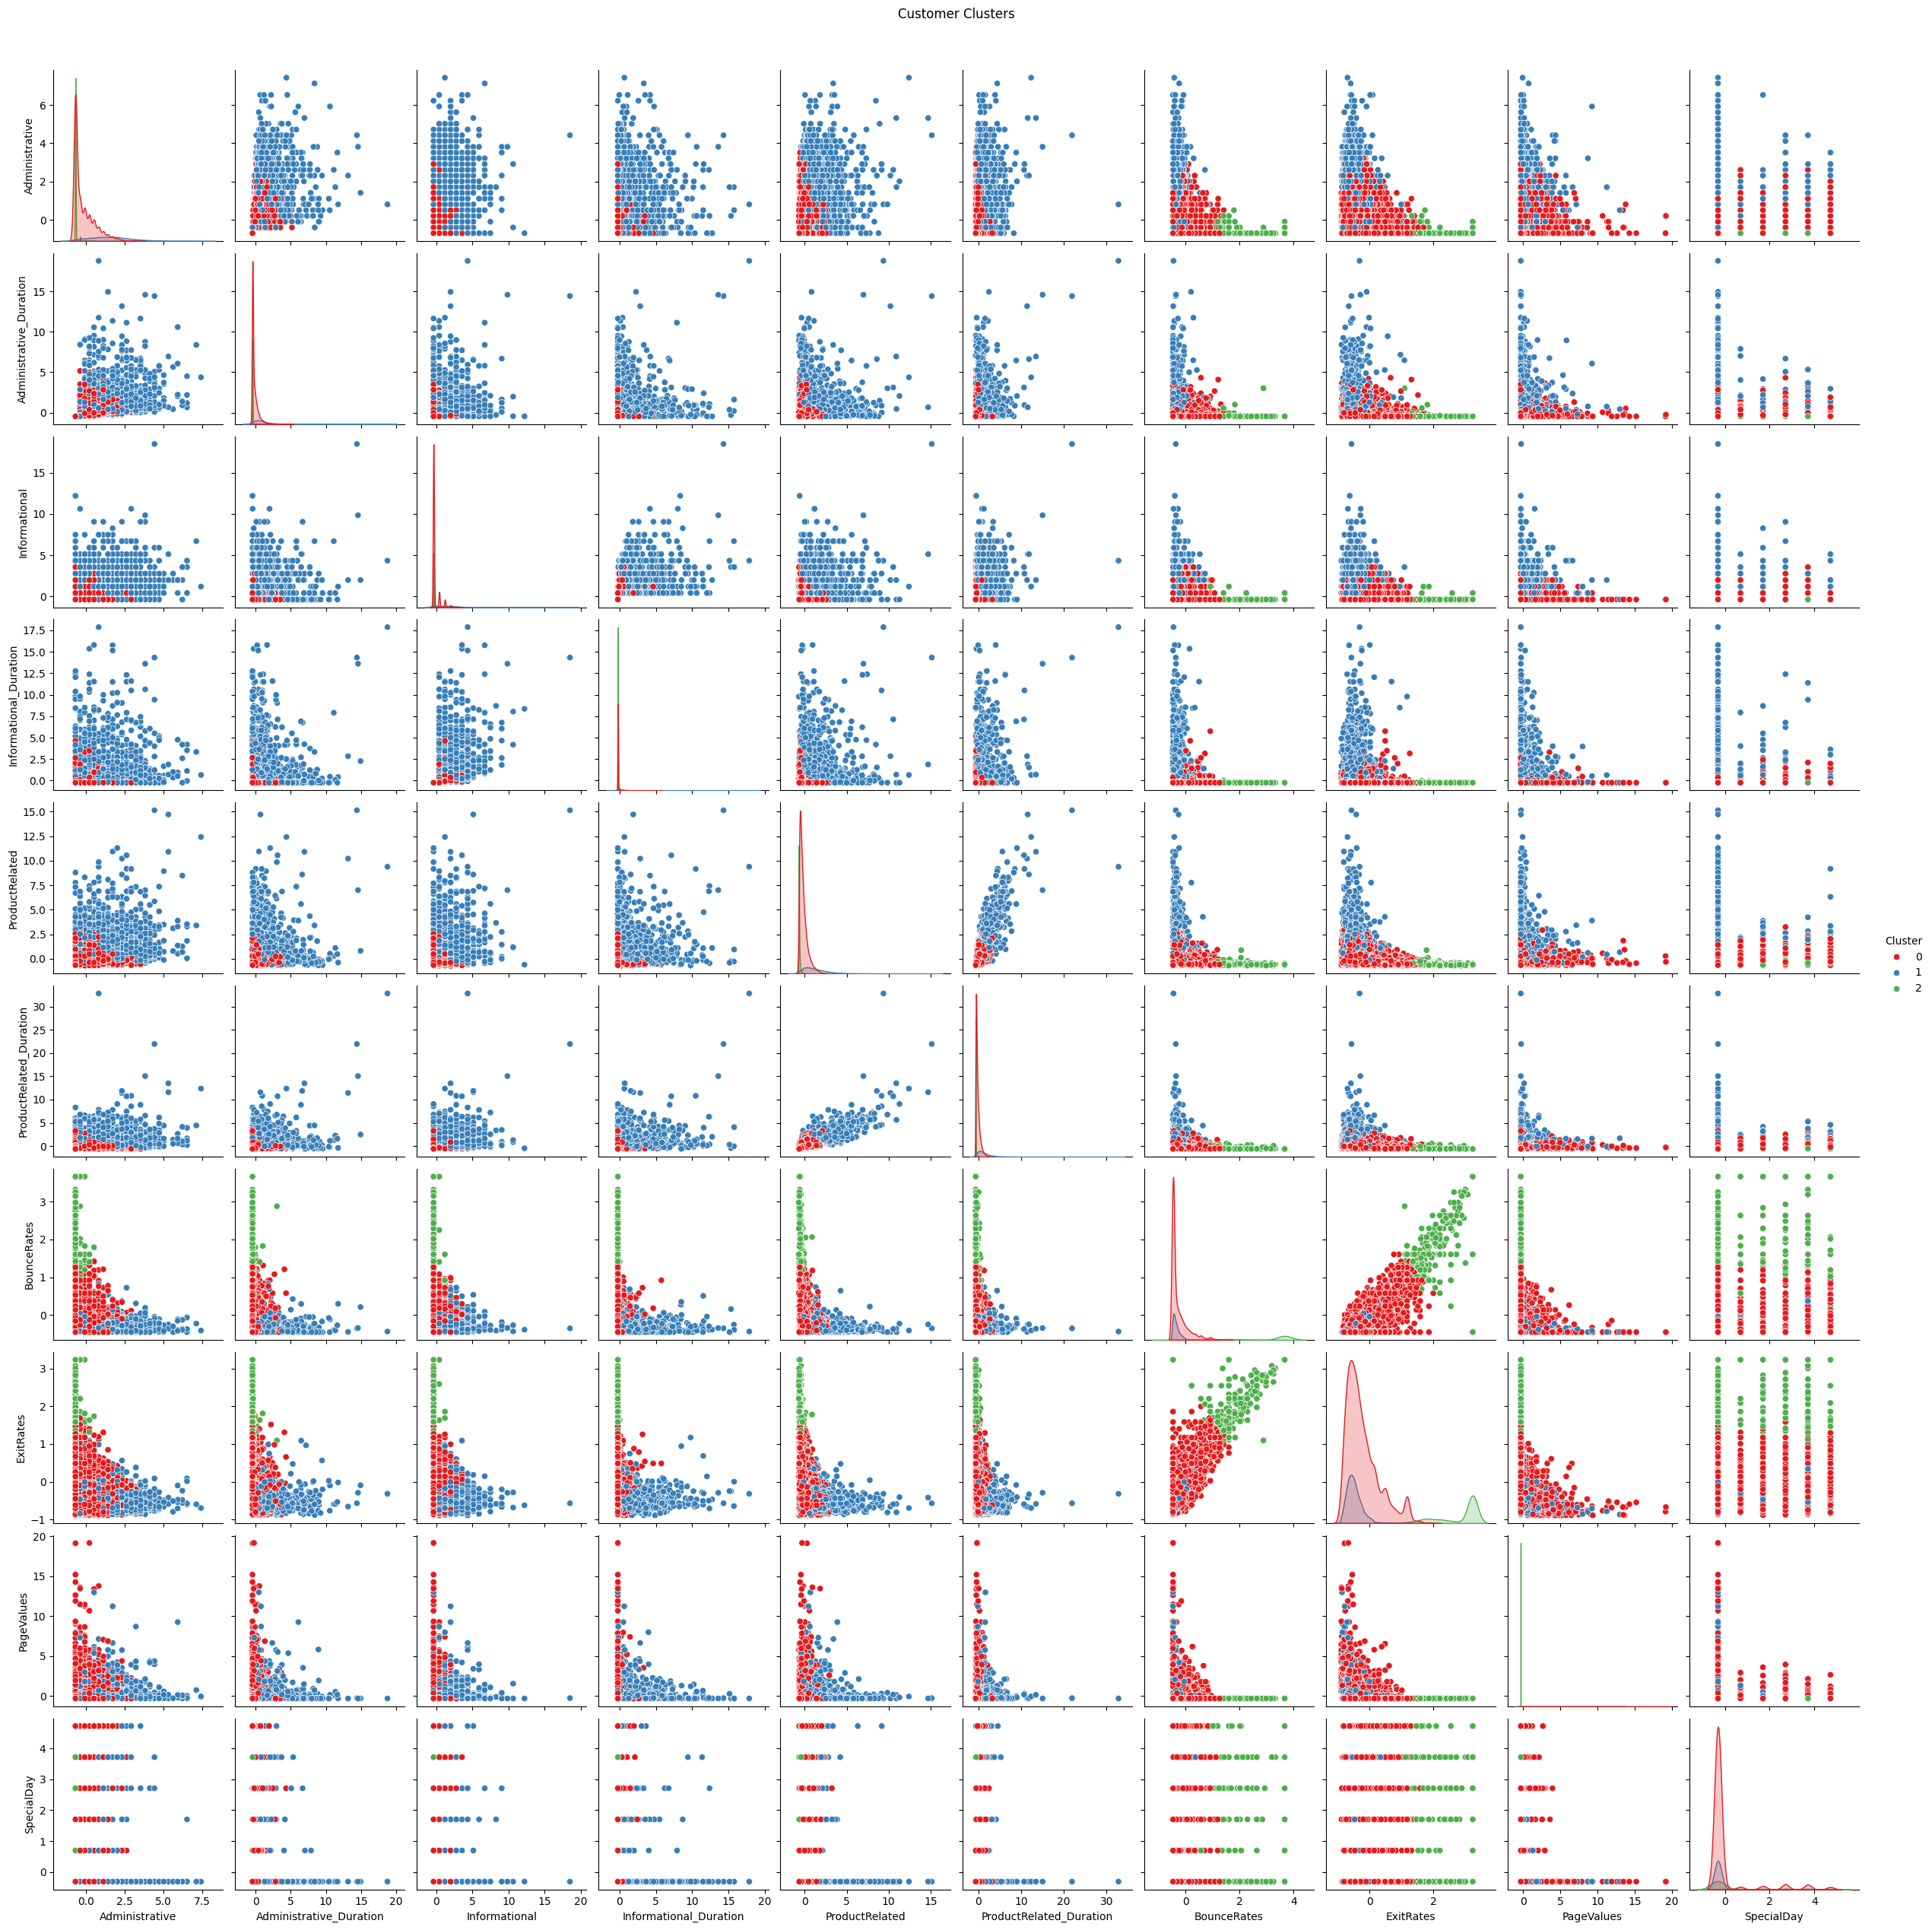

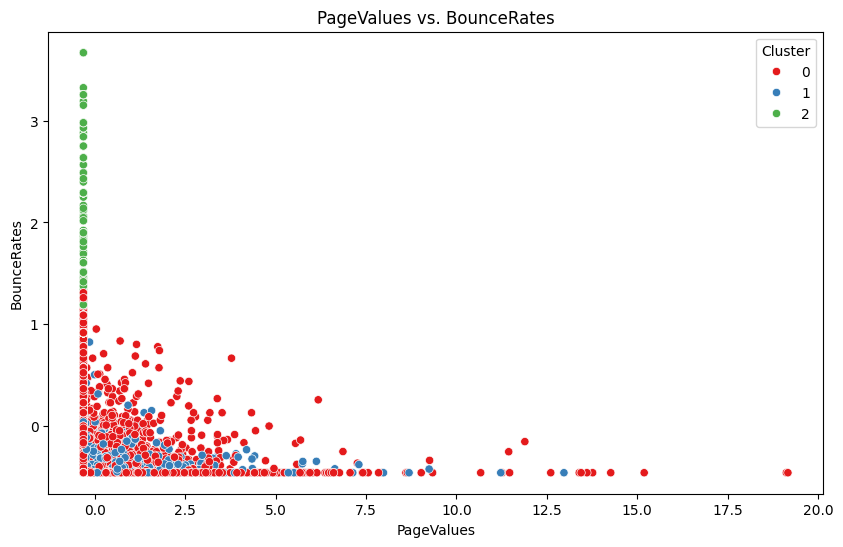

In [ ]:
# Pairplot to visualize clusters
sns.pairplot(df, hue='Cluster', vars=features, palette='Set1')
plt.suptitle('Customer Clusters', y=1.02)
plt.show()

# Scatter plot for two key features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PageValues', y='BounceRates', hue='Cluster', data=df, palette='Set1')
plt.title('PageValues vs. BounceRates')
plt.xlabel('PageValues')
plt.ylabel('BounceRates')
plt.legend(title='Cluster')
plt.show()

First image consists of plots display the relationships between multiple features and how the clusters are distributed across these features. Second image is a plot that focuses on the relationship between PageValues and BounceRates, showing how the clusters are distributed across these two features. Red cluster represents less engaged users who visit fewer pages, spend less time, and have higher bounce rates. Blue cluster represents moderately engaged users who have an average interaction with the site. Green cluster might indicate users who have mixed behavior, with some highly engaged and others who leave the site quickly. For the second plt there is not an exact cluster seen. But it can be said that green cluster represents users with very specific behavior, possibly those who bounce very quickly but also have some high engagement instances.

# Feature Engineering

I want to creat new features as combinations of the variables to capture additional information that might help my model. I will apply a log transformation to the Administrative, Informational, ProductRelated, and PageValues features to reduce skewness

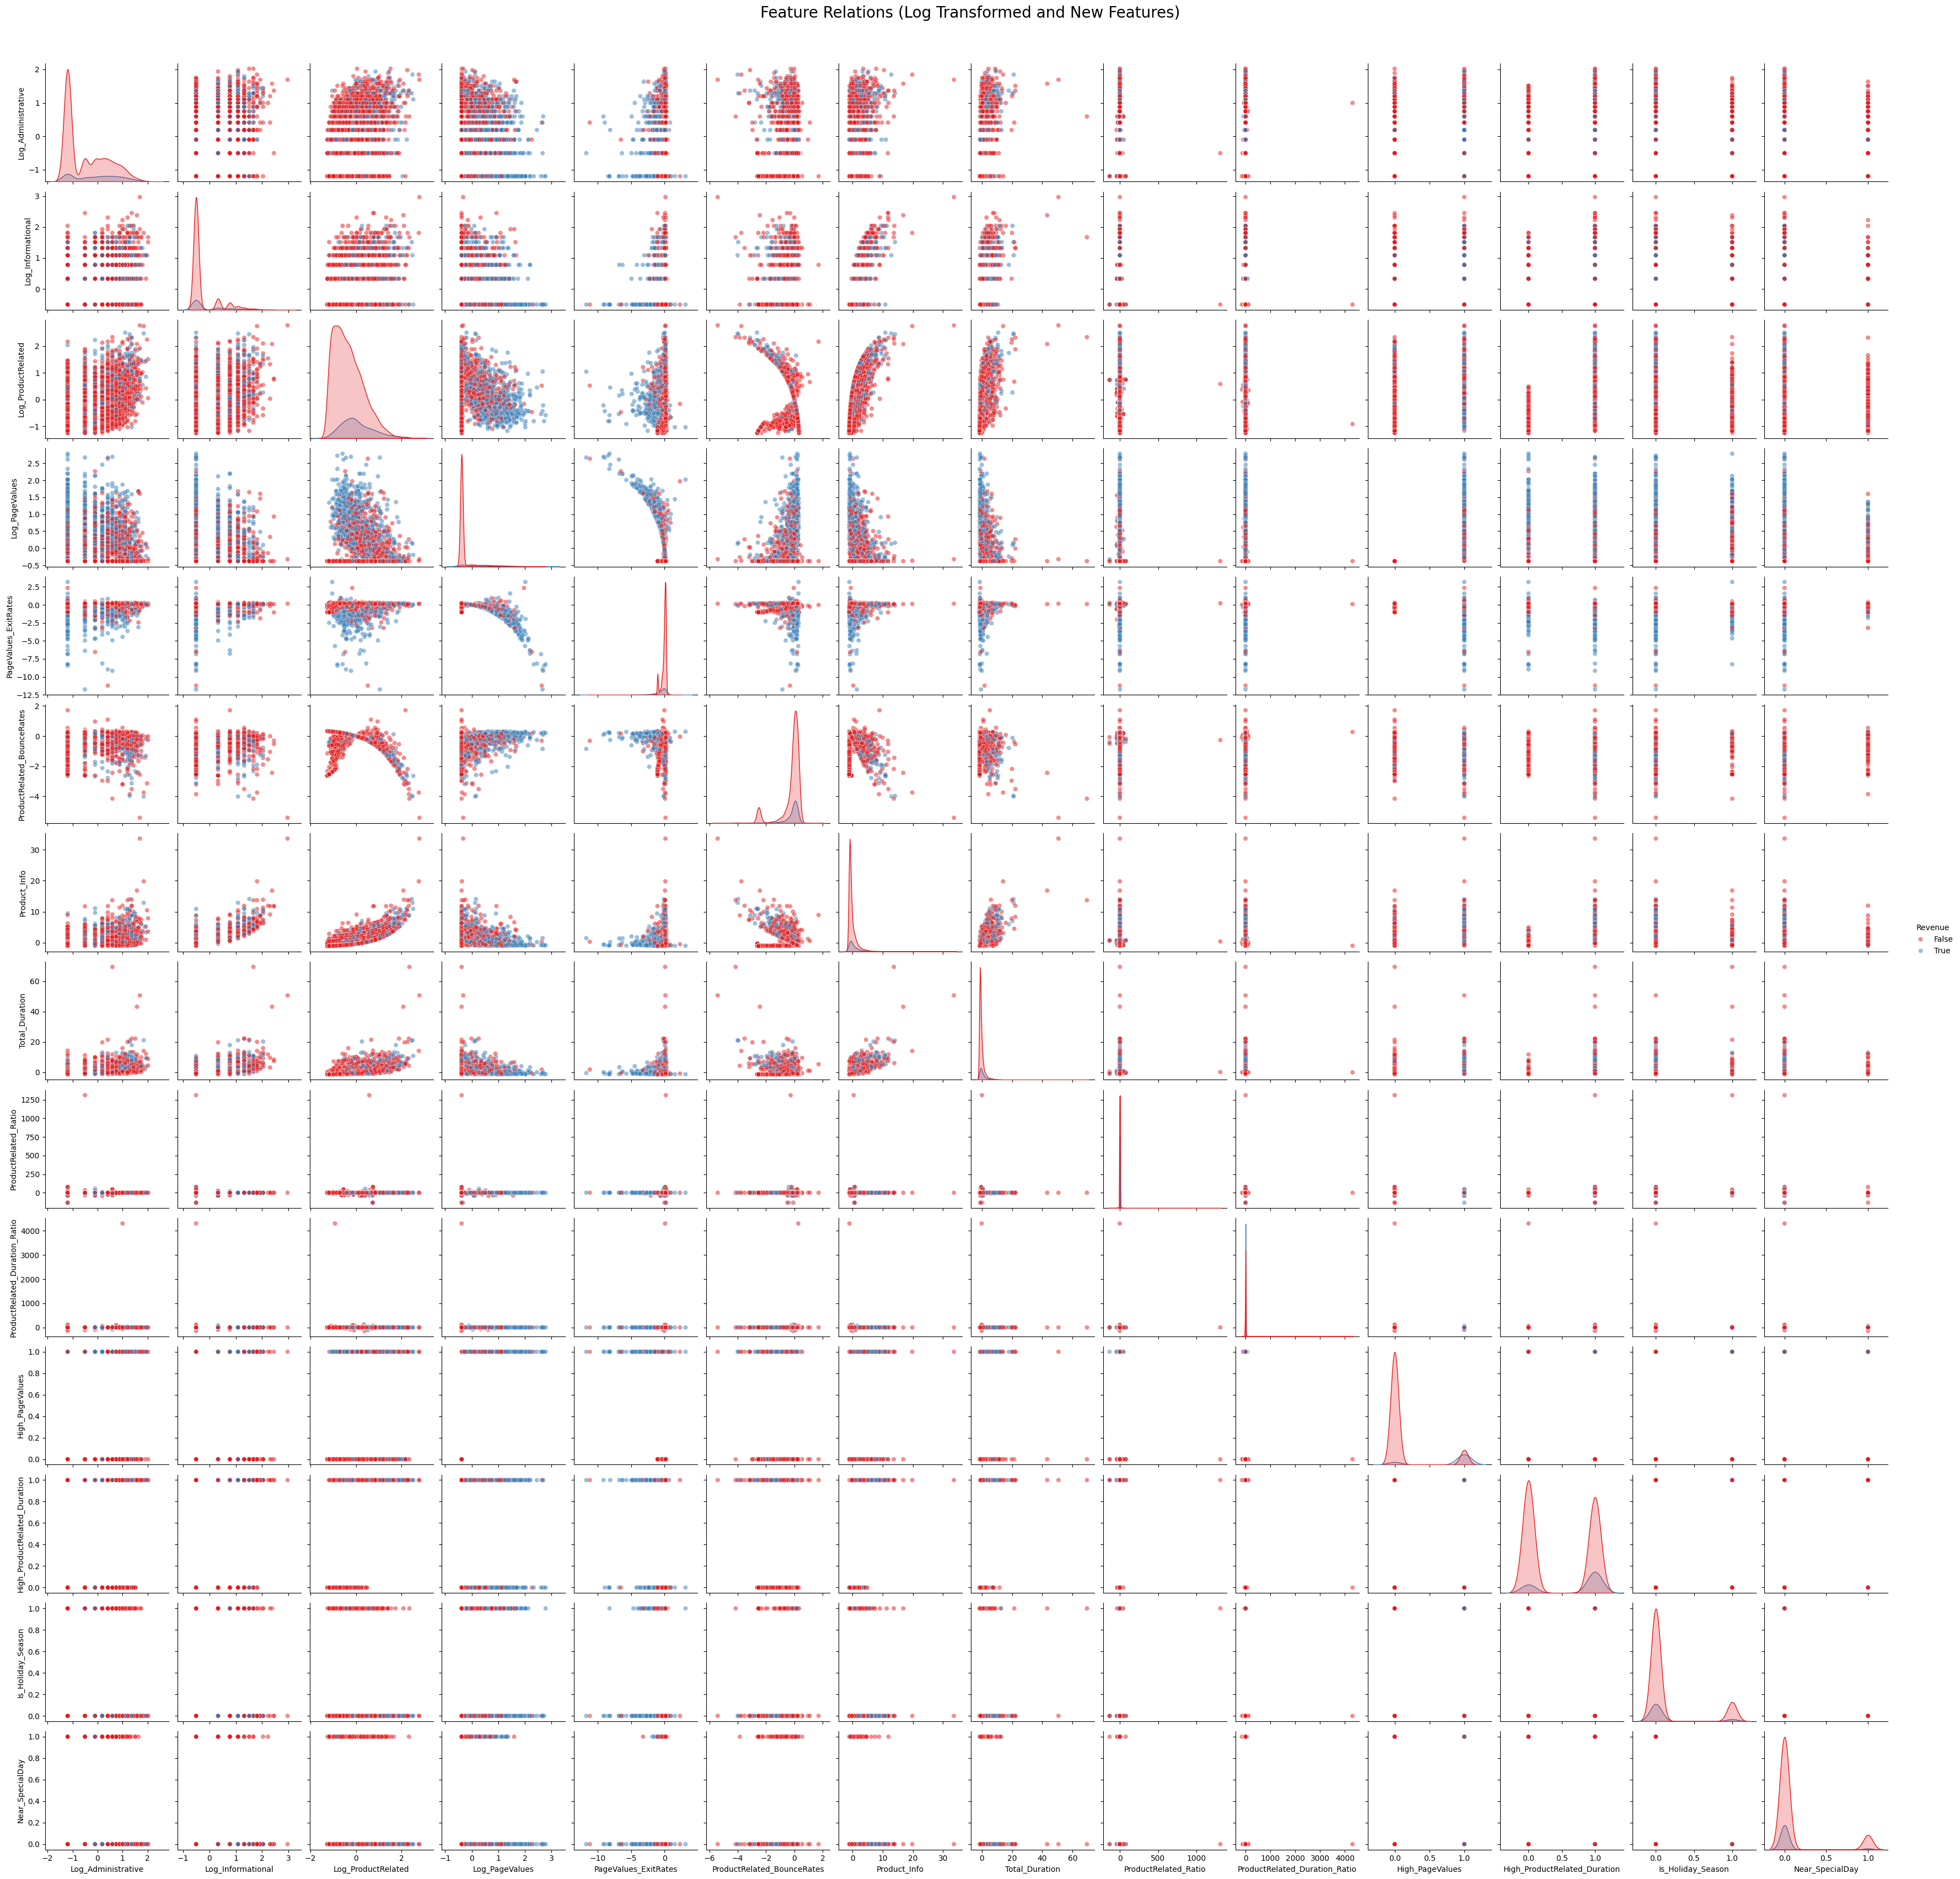

In [ ]:
import numpy as np
# Feature Engineering
df['PageValues_ExitRates'] = df['PageValues'] * df['ExitRates']
df['ProductRelated_BounceRates'] = df['ProductRelated'] * df['BounceRates']
df['Product_Info'] = df['ProductRelated'] + df['Informational']
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['ProductRelated_Ratio'] = df['ProductRelated'] / (df['Administrative'] + df['Informational'] + df['ProductRelated']).replace(0, 1)
df['ProductRelated_Duration_Ratio'] = df['ProductRelated_Duration'] / df['Total_Duration'].replace(0, 1)
df['High_PageValues'] = (df['PageValues'] > df['PageValues'].median()).astype(int)
df['High_ProductRelated_Duration'] = (df['ProductRelated_Duration'] > df['ProductRelated_Duration'].median()).astype(int)
df['Is_Holiday_Season'] = df['Month'].apply(lambda x: 1 if x in [11, 12, 1] else 0)
df['Near_SpecialDay'] = (df['SpecialDay'] > 0).astype(int)

# Apply log transformation to reduce skewness
df['Log_Administrative'] = np.log1p(df['Administrative'])
df['Log_Informational'] = np.log1p(df['Informational'])
df['Log_ProductRelated'] = np.log1p(df['ProductRelated'])
df['Log_PageValues'] = np.log1p(df['PageValues'])

# Subsample the data if necessary
df_sampled = df.sample(frac=0.5, random_state=42)  # Adjust frac as needed

# Select features for pairplot
selected_features = ['Log_Administrative', 'Log_Informational', 'Log_ProductRelated', 'Log_PageValues',
                     'PageValues_ExitRates', 'ProductRelated_BounceRates', 'Product_Info', 'Total_Duration',
                     'ProductRelated_Ratio', 'ProductRelated_Duration_Ratio', 'High_PageValues',
                     'High_ProductRelated_Duration', 'Is_Holiday_Season', 'Near_SpecialDay', 'Revenue']

# Create a pairplot with transformed and new features
g1 = sns.pairplot(df_sampled[selected_features], hue='Revenue', palette='Set1', plot_kws={'alpha':0.5})

# Enhance the plot title and labels
g1.fig.suptitle('Feature Relations (Log Transformed and New Features)', fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

Each dot corresponds to a single record (or row) in the dataset. Orange dots epresent records where Revenue is True (purchase is made). Off diagonal plots are scatter plots showing the relationship between pairs of features.


Now i want to construct a revised correlation matrix in order to see whether my feature engineering makes sense.

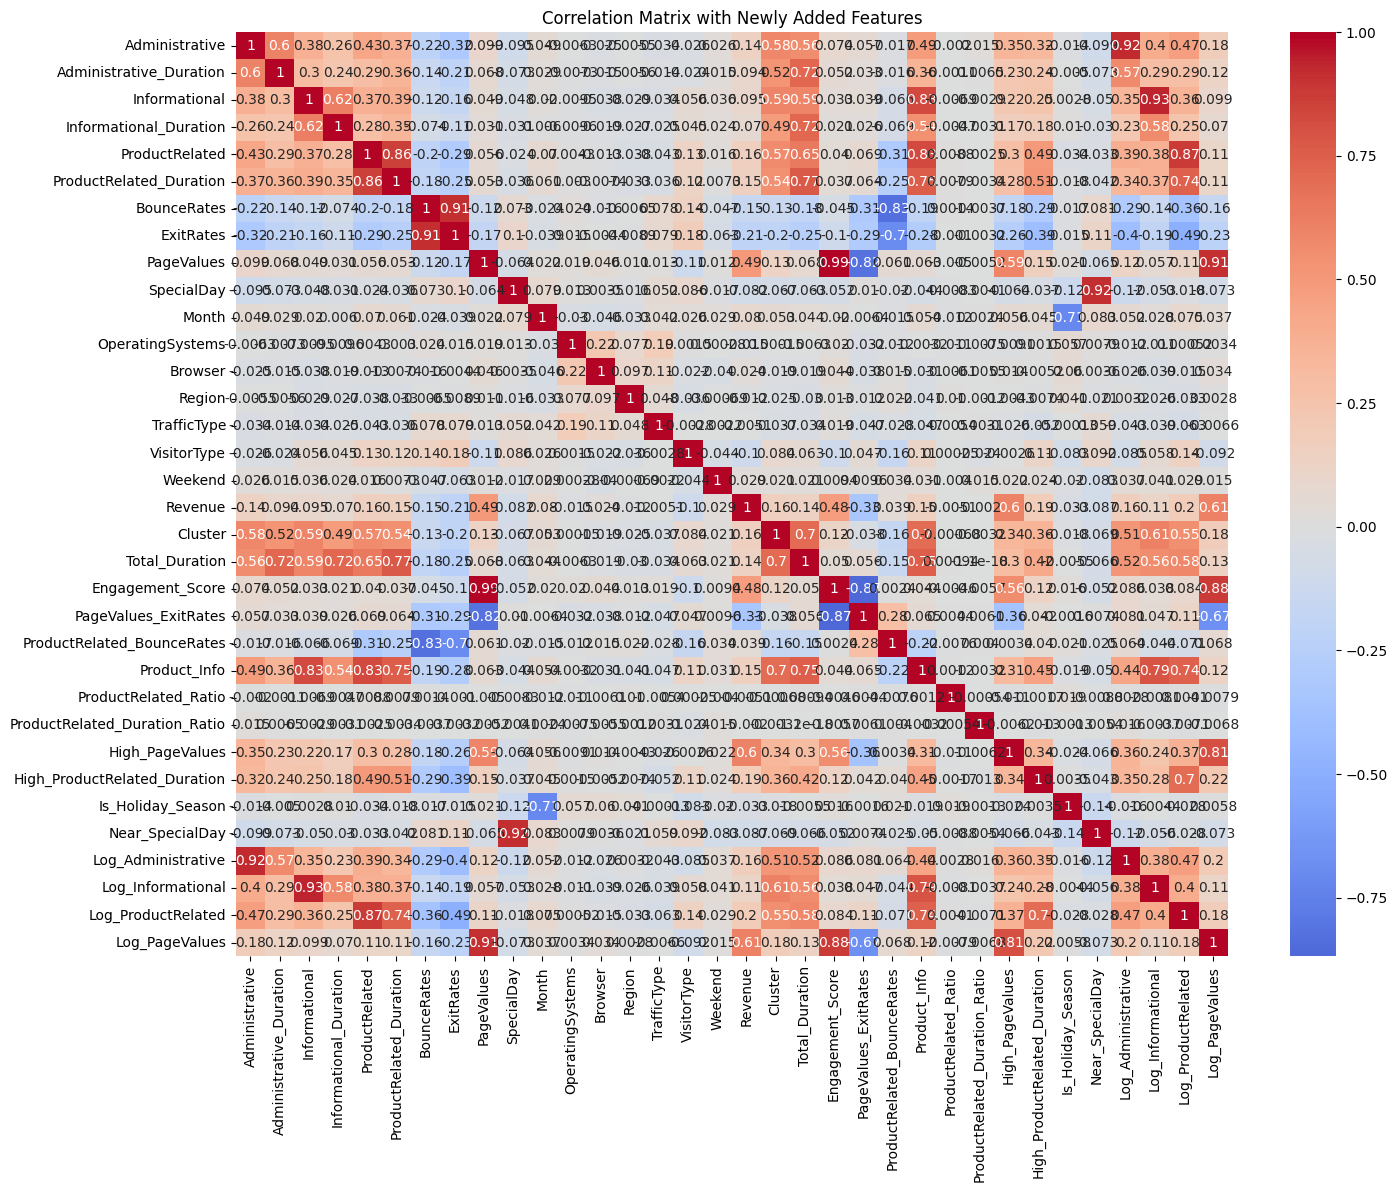

In [ ]:
# Create a new correlation matrix
correlation_matrix = df.corr()

# Plot the new correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix with Newly Added Features')
plt.show()

New variables like High_PageValues and Engagement_Score have noteworthy associationswith Revenue, implying that they could be useful in predictive modeling.

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.891052   0.679167  0.566957  0.618009  0.898323
Decision Tree        0.855637   0.533884  0.561739  0.547458  0.735735
Random Forest        0.892674   0.687764  0.566957  0.621544  0.918062
SVM                  0.888619   0.746224  0.429565  0.545254  0.865334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


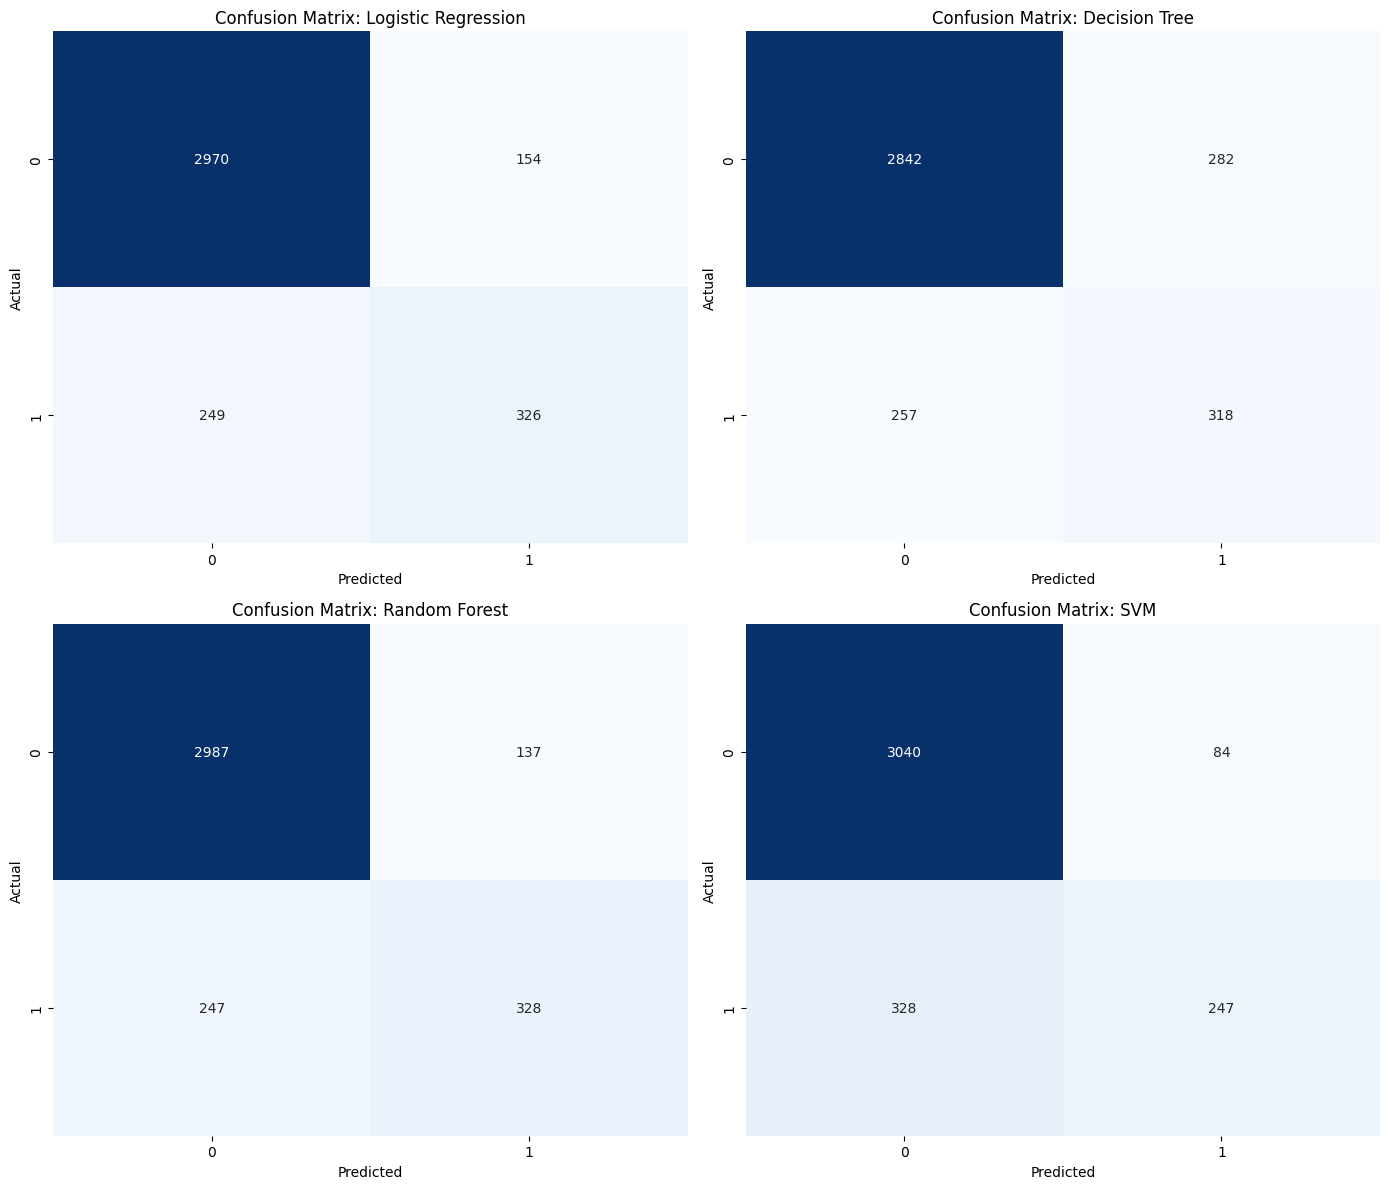

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix: {title}')

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Train and plot confusion matrix for each model
for ax, (model_name, model) in zip(axes.flatten(), models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(ax, y_test, y_pred, model_name)

plt.tight_layout()
plt.show()

The Random Forest model stands out as the best performer across all the evaluation metrics. It achieves the highest accuracy, F1 score, and ROC AUC, indicating it is the most balanced and effective model for this dataset. It appears to perform the best overall, striking an appropriate balance between minimizing false positives and effectively predicting actual positives. To further enhance the Random Forest model's performance i will do hyperparameter tuning.



# Model Optimization

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)
y_prob_optimized = best_model.predict_proba(X_test)[:, 1]

optimized_results = {
    'Accuracy': accuracy_score(y_test, y_pred_optimized),
    'Precision': precision_score(y_test, y_pred_optimized),
    'Recall': recall_score(y_test, y_pred_optimized),
    'F1 Score': f1_score(y_test, y_pred_optimized),
    'ROC AUC': roc_auc_score(y_test, y_prob_optimized)
}

print("Optimized model results:", optimized_results)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Optimized model results: {'Accuracy': 0.8967288456339552, 'Precision': 0.710239651416122, 'Recall': 0.5669565217391305, 'F1 Score': 0.6305609284332689, 'ROC AUC': 0.92508099983299}


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gbm = gbm.predict(X_test)
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_prob_gbm)

print(f'Gradient Boosting Accuracy: {accuracy_gbm}')
print(f'Gradient Boosting Precision: {precision_gbm}')
print(f'Gradient Boosting Recall: {recall_gbm}')
print(f'Gradient Boosting F1 Score: {f1_gbm}')
print(f'Gradient Boosting ROC AUC: {roc_auc_gbm}')

Gradient Boosting Accuracy: 0.8964585022979183
Gradient Boosting Precision: 0.6991701244813278
Gradient Boosting Recall: 0.5860869565217391
Gradient Boosting F1 Score: 0.6376537369914853
Gradient Boosting ROC AUC: 0.9287421366141513


In [83]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb}')
print(f'XGBoost Precision: {precision_xgb}')
print(f'XGBoost Recall: {recall_xgb}')
print(f'XGBoost F1 Score: {f1_xgb}')
print(f'XGBoost ROC AUC: {roc_auc_xgb}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8921330089213301
XGBoost Precision: 0.6725490196078432
XGBoost Recall: 0.5965217391304348
XGBoost F1 Score: 0.632258064516129
XGBoost ROC AUC: 0.9167906251739688


Logistic Regression Cross-Validation ROC-AUC scores: [0.97835055 0.91314665 0.8470659  0.85225    0.84460512]
Logistic Regression Mean Cross-Validation ROC-AUC score: 0.8870836439500891

Decision Tree Cross-Validation ROC-AUC scores: [0.74308994 0.77770351 0.70755746 0.66975385 0.6896725 ]
Decision Tree Mean Cross-Validation ROC-AUC score: 0.7175554489541625

Random Forest Cross-Validation ROC-AUC scores: [0.98010474 0.94325988 0.88175993 0.86160764 0.86370853]
Random Forest Mean Cross-Validation ROC-AUC score: 0.9060881435067522

SVM Cross-Validation ROC-AUC scores: [0.96579492 0.88125405 0.83941474 0.79580398 0.80124559]
SVM Mean Cross-Validation ROC-AUC score: 0.8567026570942945

XGBoost Cross-Validation ROC-AUC scores: [0.96521082 0.94748013 0.88953106 0.85360161 0.84671544]
XGBoost Mean Cross-Validation ROC-AUC score: 0.9005078113693896



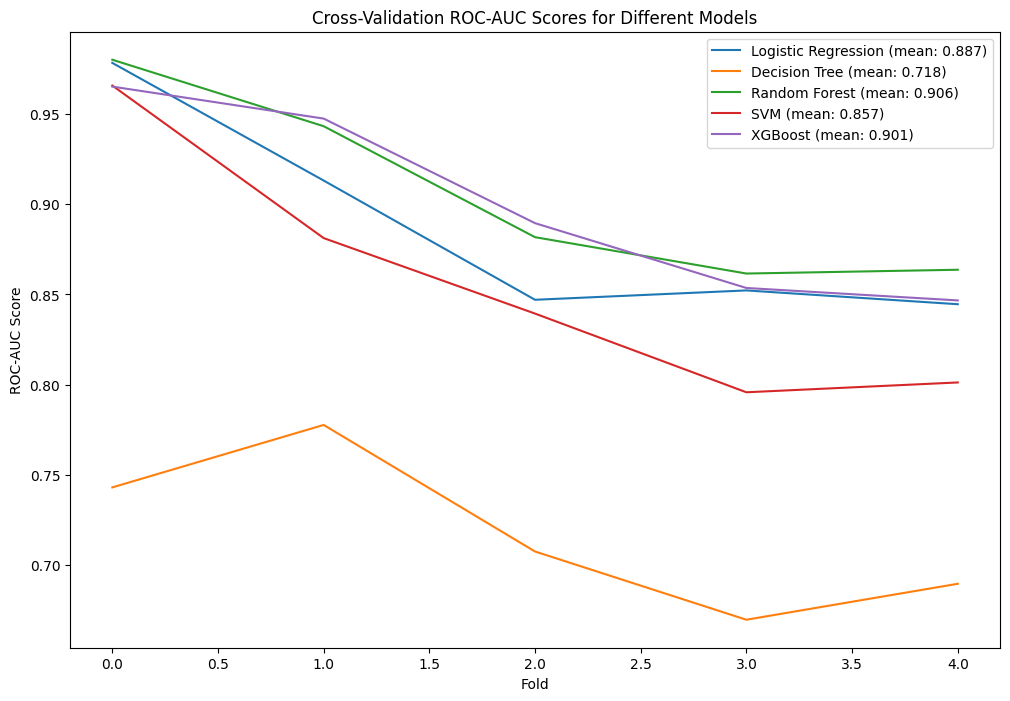

In [86]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Cross-validation scores for all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': xgb
}

# Function to get cross-validation scores
def cross_val_scores(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
    return cv_scores

# Evaluate cross-validation scores for each model
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_scores(model, X, y)
    cv_results[name] = cv_scores
    print(f'{name} Cross-Validation ROC-AUC scores: {cv_scores}')
    print(f'{name} Mean Cross-Validation ROC-AUC score: {np.mean(cv_scores)}\n')

# Plot cross-validation scores
plt.figure(figsize=(12, 8))
for name, cv_scores in cv_results.items():
    plt.plot(cv_scores, label=f'{name} (mean: {np.mean(cv_scores):.3f})')
plt.xlabel('Fold')
plt.ylabel('ROC-AUC Score')
plt.title('Cross-Validation ROC-AUC Scores for Different Models')
plt.legend()
plt.show()

**Insights and Conclusions:**

Random Forest and XGBoost are the most promising models for predicting the target variable in this dataset, according to their high performance and stability during cross-validation folds.

Features such as PageValues, Engagement_Score had the highest correlation with the target variable Revenue.

The dataset might contain noisy or missing data that can affect model performance. Ensuring high data quality through cleaning and preprocessing is crucial. The model can be further improved by investigating why the Decision Tree model exhibits significant variability and poor performance. This could entail using more complex approaches or feature engineering to improve its stability.